<a href="https://colab.research.google.com/github/HakanAknc/Machine_Learning_py/blob/main/Deneme1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

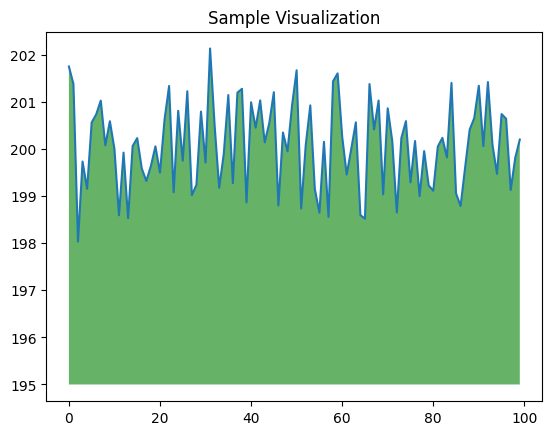

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Features
X = np.array([
              [0, 0, 0, 0],
              [0, 0, 0, 1],
              [1, 0, 0, 0],
              [2, 1, 0, 0],
              [2, 2, 1, 0],
              [2, 2, 1, 1],
              [1, 2, 1, 1],
              [0, 1, 0, 0],
              [0, 2, 1, 0],
              [2, 1, 1, 0],
              [0, 1, 1, 1],
              [1, 1, 0, 1],
              [1, 0, 1, 0],
              [2, 1, 0, 1]
])# Label
Y = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
model = GaussianNB()
model.fit(X, Y)

GaussianNB()

In [ ]:
print(model.predict([[2, 2, 0, 1]]))

[0]


Gerçek değerler:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Tahminler:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


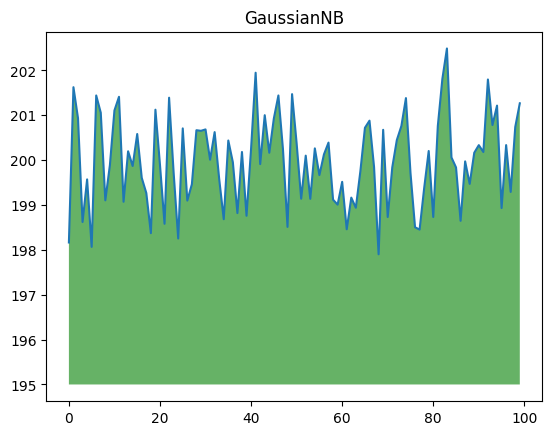

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt
import numpy as np


# Örnek bir veri seti yükleme
data = load_iris()
X = data.data
y = data.target

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gaussian Naive Bayes modelini oluşturma ve eğitme
model = GaussianNB()
model.fit(X_train, y_train)

# Modeli kullanarak tahmin yapma
y_pred = model.predict(X_test)

# Tahmin sonuçlarını inceleme
print("Gerçek değerler: ", y_test)
print("Tahminler: ", y_pred)

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

# Grafik çizdirildi
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("GaussianNB")
plt.show()

In [ ]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
Y = np.array([1, 1, 1, 2, 2, 2])
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X, Y)
GaussianNB()
print(clf.predict([[-0.8, -1]]))

clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))
GaussianNB()
print(clf_pf.predict([[-0.8, -1]]))


[1]
[1]


In [ ]:
import pandas as pd
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import numpy as np

data = pd.DataFrame({'P_Movies': [17,64,18,20,38,49,55,25,29,31,33],
             'Gender': [1,0,1,0,1,0,0,1,1,0,1]})
data =data.sort_values('P_Movies')
data

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names,
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)

    #define Decision Tree
dt = DecisionTreeClassifier(criterion = 'entropy')
#Define input vectors
#X is the features in this dataset
X = data['P_Movies'].values.reshape(-1, 1)
#Y is the vector with our Target Variables
Y = data['Gender'].values
#start fitting process
dt.fit(X, Y)

tree_graph_to_png(dt, feature_names=['P_Movies'],
                 png_file_to_save='dt.png')

d  = np.array([7, 15, 43, 45])
d=d.reshape(-1, 1)

dt.predict(d)

array([1, 1, 1, 0])

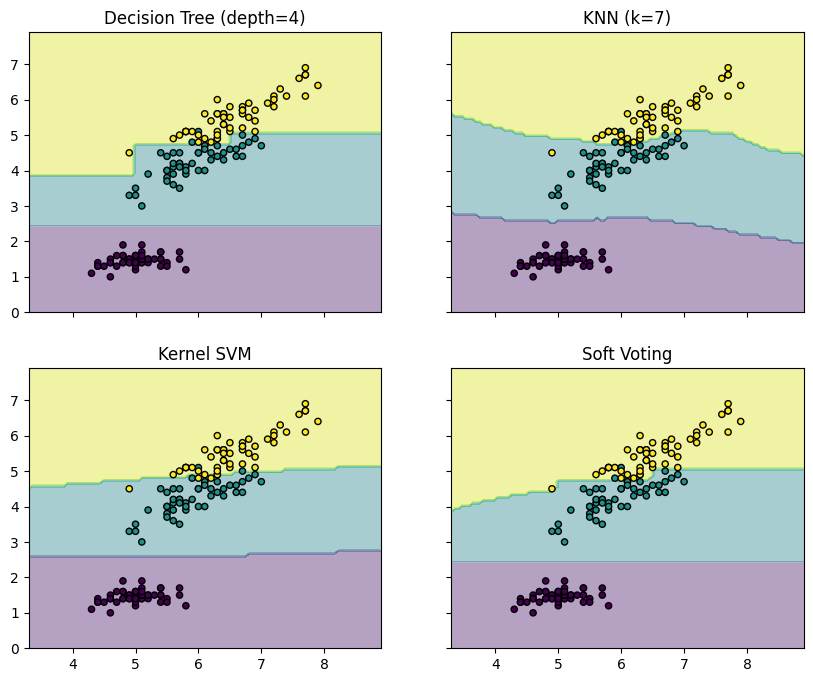

In [ ]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

Automatically created module for IPython interactive environment


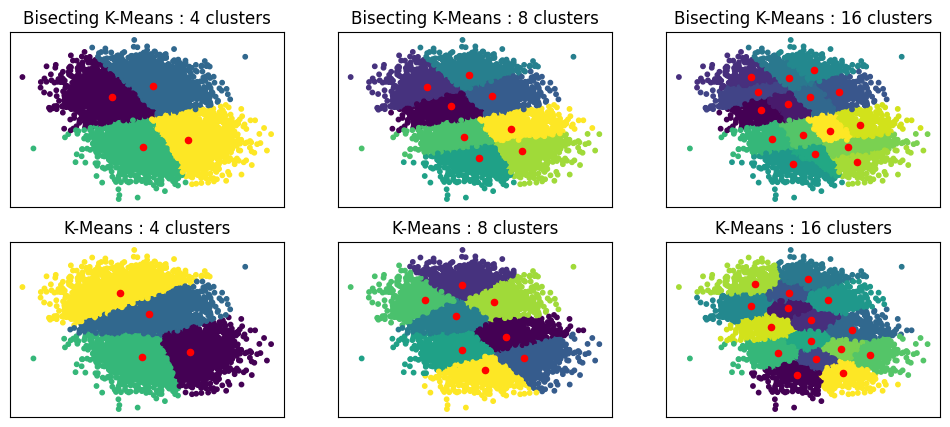

In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import BisectingKMeans, KMeans
from sklearn.datasets import make_blobs

print(__doc__)


# Generate sample data
n_samples = 10000
random_state = 0

X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [4, 8, 16]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()